In [1]:
def mp_cr(fname1='CA_Counties/CA_Counties.shp',fname2='df_county.csv'):
    import geopandas as gpd
    import pandas as pd
    import numpy as np
    gdf = gpd.read_file(fname1)
    df2 = pd.read_csv(fname2)
    df2['CC'] = df2['Total_Crime']
    mp_dict = dict(zip(df2['County'], df2['CC']))
    
    for index1, row1 in gdf.iterrows():
        if row1['NAME'] in mp_dict.keys():
            gdf.loc[index1, 'CC'] = mp_dict[row1['NAME']] 
        else:
            gdf.loc[index1, 'CC'] = 0
    
    for index2, row2 in gdf.iterrows():
        if gdf.loc[index2, 'CC'] == 0 or np.isnan(gdf.loc[index2, 'CC']):
            gdf.loc[index2, 'Cmap'] = 0
        if gdf.loc[index2, 'CC']>0 and gdf.loc[index2, 'CC']<=7000:
            for i in range(7):    
                if gdf.loc[index2, 'CC']>i*1000 and gdf.loc[index2, 'CC']<=(i+1)*1000:
                    gdf.loc[index2, 'Cmap'] = i+1
        if gdf.loc[index2, 'CC']>7000:
            gdf.loc[index2, 'Cmap'] = 8
    
    gdf.to_file('CA_Counties/CA_Counties.shp')

mp_cr(fname1='CA_Counties/CA_Counties.shp',fname2='df_county.csv')

/anaconda3/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
gdf = gpd.read_file('CA_Counties/CA_Counties.shp')

/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


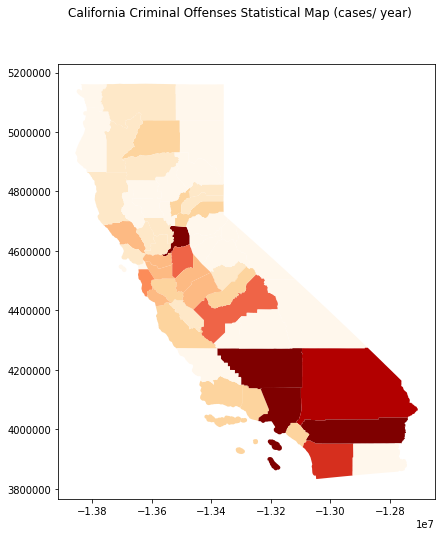

In [3]:
# gdf.columns
# gdf.head()
f, ax = plt.subplots(1,figsize=(8, 8))
ax = gdf.plot(axes=ax, alpha=1, column='Cmap', cmap='OrRd')
f.suptitle('California Criminal Offenses Statistical Map (cases/ year)')
# ax.set_axis_off()
plt.show()